# 第9章: Assessing Studies Based on Multiple Regression（研究の評価）練習問題

この章では内的妥当性、外的妥当性、測定誤差、同時因果性などについて学びます。

In [1]:
library(AER)
data("CASchools")
CASchools$STR <- CASchools$students / CASchools$teachers
CASchools$score <- (CASchools$read + CASchools$math) / 2

Loading required package: car



Loading required package: carData



Loading required package: lmtest



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: sandwich



Loading required package: survival



---
## 問題1: 内的妥当性の脅威の特定

CASchoolsデータの分析において、内的妥当性への潜在的な脅威を検討します。

1. score ~ STR + english + lunch のモデルを推定
2. 省略変数バイアスの可能性を議論
3. 他の潜在的な脅威を列挙

In [2]:
# 問題1の解答欄



### 模範解答

In [3]:
# 模範解答
# 1. モデル推定
model <- lm(score ~ STR + english + lunch, data = CASchools)
summary(model)

# 2-3. 内的妥当性への脅威の議論
cat("\n=== 内的妥当性への潜在的な脅威 ===", "\n\n")

cat("1. 省略変数バイアス（Omitted Variable Bias）:\n")
cat("   - 家庭環境（親の教育水準、家庭での学習サポート）\n")
cat("   - 学校の設備や資源\n")
cat("   - 教師の質や経験\n")
cat("   - 地域の社会経済的特性\n\n")

cat("2. 測定誤差（Measurement Error）:\n")
cat("   - テストスコアは学力の不完全な測定\n")
cat("   - STRはクラスの実際の規模を正確に反映していない可能性\n\n")

cat("3. 同時因果性（Simultaneity）:\n")
cat("   - 低スコアの学区に教師が追加配置される可能性\n")
cat("   - 結果から原因への逆の因果関係\n\n")

cat("4. サンプル選択（Sample Selection）:\n")
cat("   - カリフォルニア州のみのデータ\n")
cat("   - 特定の学区が除外されている可能性\n")


Call:
lm(formula = score ~ STR + english + lunch, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.849  -5.151  -0.308   5.243  31.501 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 700.14996    4.68569 149.423  < 2e-16 ***
STR          -0.99831    0.23875  -4.181 3.54e-05 ***
english      -0.12157    0.03232  -3.762 0.000193 ***
lunch        -0.54735    0.02160 -25.341  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.08 on 416 degrees of freedom
Multiple R-squared:  0.7745,	Adjusted R-squared:  0.7729 
F-statistic: 476.3 on 3 and 416 DF,  p-value: < 2.2e-16



=== 内的妥当性への潜在的な脅威 === 



1. 省略変数バイアス（Omitted Variable Bias）:


   - 家庭環境（親の教育水準、家庭での学習サポート）


   - 学校の設備や資源


   - 教師の質や経験


   - 地域の社会経済的特性



2. 測定誤差（Measurement Error）:


   - テストスコアは学力の不完全な測定


   - STRはクラスの実際の規模を正確に反映していない可能性



3. 同時因果性（Simultaneity）:


   - 低スコアの学区に教師が追加配置される可能性


   - 結果から原因への逆の因果関係



4. サンプル選択（Sample Selection）:


   - カリフォルニア州のみのデータ


   - 特定の学区が除外されている可能性


---
## 問題2: 関数形の誤特定

関数形の誤特定をテストします。

1. 線形モデルと2次多項式モデルを比較
2. RESET検定（Ramsey's RESET test）を実行
3. 結果を解釈

In [4]:
# 問題2の解答欄



### 模範解答

In [5]:
# 模範解答
library(lmtest)

# 1. モデル比較
model_linear <- lm(score ~ STR + english + lunch, data = CASchools)
model_quad <- lm(score ~ STR + I(STR^2) + english + lunch, data = CASchools)

cat("=== 線形モデル ===", "\n")
print(summary(model_linear)$coefficients)

cat("\n=== 2次項を含むモデル ===", "\n")
print(summary(model_quad)$coefficients)

# 2. RESET検定
cat("\n=== RESET検定 ===", "\n")
reset_test <- resettest(model_linear, power = 2:3, type = "fitted")
print(reset_test)

# 3. 解釈
cat("\n=== 解釈 ===", "\n")
if (reset_test$p.value < 0.05) {
  cat("p値 < 0.05：関数形の誤特定の可能性がある\n")
} else {
  cat("p値 >= 0.05：関数形の誤特定の証拠は見つからなかった\n")
}

=== 線形モデル === 


               Estimate Std. Error    t value     Pr(>|t|)
(Intercept) 700.1499572 4.68568672 149.423126 0.000000e+00
STR          -0.9983090 0.23875428  -4.181324 3.535873e-05
english      -0.1215735 0.03231728  -3.761872 1.928369e-04
lunch        -0.5473454 0.02159885 -25.341418 2.303048e-86



=== 2次項を含むモデル === 


               Estimate  Std. Error    t value     Pr(>|t|)
(Intercept) 740.8141792 29.78675277  24.870592 2.985045e-84
STR          -5.1776119  3.03272179  -1.707249 8.852370e-02
I(STR^2)      0.1064437  0.07700190   1.382351 1.676074e-01
english      -0.1179204  0.03238994  -3.640647 3.063138e-04
lunch        -0.5491089  0.02161292 -25.406509 1.419385e-86



=== RESET検定 === 



	RESET test

data:  model_linear
RESET = 7.1749, df1 = 2, df2 = 414, p-value = 0.0008645




=== 解釈 === 


p値 < 0.05：関数形の誤特定の可能性がある


---
## 問題3: 測定誤差のシミュレーション

説明変数の測定誤差がOLS推定量に与える影響をシミュレーションで確認します。

1. 真のモデル Y = 5 + 3X + u を生成
2. 測定誤差を含む X* = X + v を作成
3. Y ~ X* を推定し、推定量のバイアスを確認

In [6]:
# 問題3の解答欄



### 模範解答

=== シミュレーション結果 === 


真のβ = 3 



測定誤差なし:


  平均: 2.9995 


  標準偏差: 0.03198014 



測定誤差あり:


  平均: 2.400235 


  標準偏差: 0.04693352 



理論的な減衰係数: 0.8 


期待されるβ̂: 2.4 


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差なし' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '測定誤差あり' in 'mbcsToSbcs': dot substituted for <8a>”


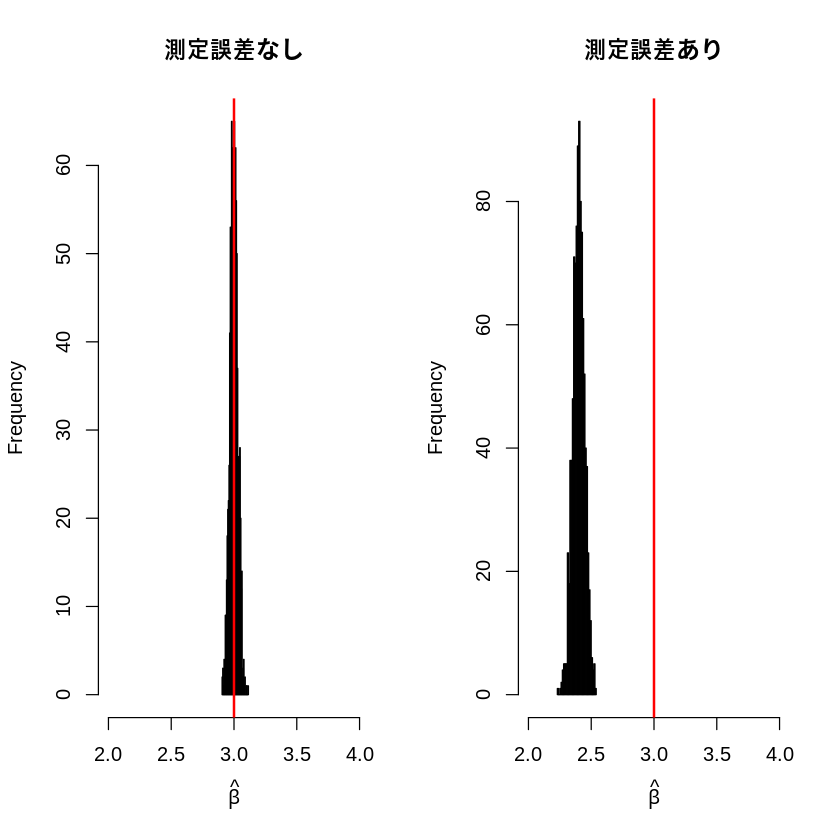

In [7]:
# 模範解答
set.seed(123)
n <- 1000
n_sim <- 1000

beta_true <- 3
sigma_u <- 2  # 誤差項の標準偏差
sigma_v <- 1  # 測定誤差の標準偏差

# 推定値を格納
beta_no_error <- numeric(n_sim)
beta_with_error <- numeric(n_sim)

for (i in 1:n_sim) {
  X <- rnorm(n, 5, 2)  # 真のX
  u <- rnorm(n, 0, sigma_u)
  v <- rnorm(n, 0, sigma_v)
  
  Y <- 5 + beta_true * X + u
  X_star <- X + v  # 測定誤差を含むX
  
  # 測定誤差なし
  beta_no_error[i] <- coef(lm(Y ~ X))[2]
  # 測定誤差あり
  beta_with_error[i] <- coef(lm(Y ~ X_star))[2]
}

# 結果
cat("=== シミュレーション結果 ===", "\n")
cat("真のβ =", beta_true, "\n\n")
cat("測定誤差なし:\n")
cat("  平均:", mean(beta_no_error), "\n")
cat("  標準偏差:", sd(beta_no_error), "\n\n")
cat("測定誤差あり:\n")
cat("  平均:", mean(beta_with_error), "\n")
cat("  標準偏差:", sd(beta_with_error), "\n\n")

# 理論的な減衰バイアス
sigma_X <- 2
attenuation <- sigma_X^2 / (sigma_X^2 + sigma_v^2)
cat("理論的な減衰係数:", attenuation, "\n")
cat("期待されるβ̂:", beta_true * attenuation, "\n")

# ヒストグラム
par(mfrow = c(1, 2))
hist(beta_no_error, breaks = 30, main = "測定誤差なし", xlab = expression(hat(beta)),
     col = "lightblue", xlim = c(2, 4))
abline(v = beta_true, col = "red", lwd = 2)

hist(beta_with_error, breaks = 30, main = "測定誤差あり", xlab = expression(hat(beta)),
     col = "lightgreen", xlim = c(2, 4))
abline(v = beta_true, col = "red", lwd = 2)
par(mfrow = c(1, 1))

---
## 問題4: 外的妥当性の検討

CASchoolsの結果が他の地域に一般化できるかを検討します。

1. データの記述統計を確認
2. カリフォルニア州の特性を考慮
3. 外的妥当性への脅威を議論

In [8]:
# 問題4の解答欄



### 模範解答

=== データの記述統計 === 


     score            STR           english           lunch       
 Min.   :605.5   Min.   :14.00   Min.   : 0.000   Min.   :  0.00  
 1st Qu.:640.0   1st Qu.:18.58   1st Qu.: 1.941   1st Qu.: 23.28  
 Median :654.5   Median :19.72   Median : 8.778   Median : 41.75  
 Mean   :654.2   Mean   :19.64   Mean   :15.768   Mean   : 44.71  
 3rd Qu.:666.7   3rd Qu.:20.87   3rd Qu.:22.970   3rd Qu.: 66.86  
 Max.   :706.8   Max.   :25.80   Max.   :85.540   Max.   :100.00  
     income      
 Min.   : 5.335  
 1st Qu.:10.639  
 Median :13.728  
 Mean   :15.317  
 3rd Qu.:17.629  
 Max.   :55.328  


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <b1>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <aa>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <92>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '英語学習者の割合' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <84>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <98>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '無料昼食の割合' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <9d>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '平均所得' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <94>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <9f>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <94>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <8e>”


Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '学生教師比率' in 'mbcsToSbcs': dot substituted for <87>”



=== 外的妥当性への脅威 === 



1. 地理的特性:


   - カリフォルニア州は移民が多く、英語学習者の割合が高い


   - 他の州とは人口構成が異なる可能性



2. 教育制度の違い:


   - 州ごとに教育政策や予算配分が異なる


   - カリキュラムや評価基準の違い



3. 時間的な制約:


   - 1990年代後半のデータ


   - 現在の教育環境は大きく変化している可能性



4. 経済的特性:


   - カリフォルニア州の所得分布は全国平均と異なる


   - 都市部と農村部の混在


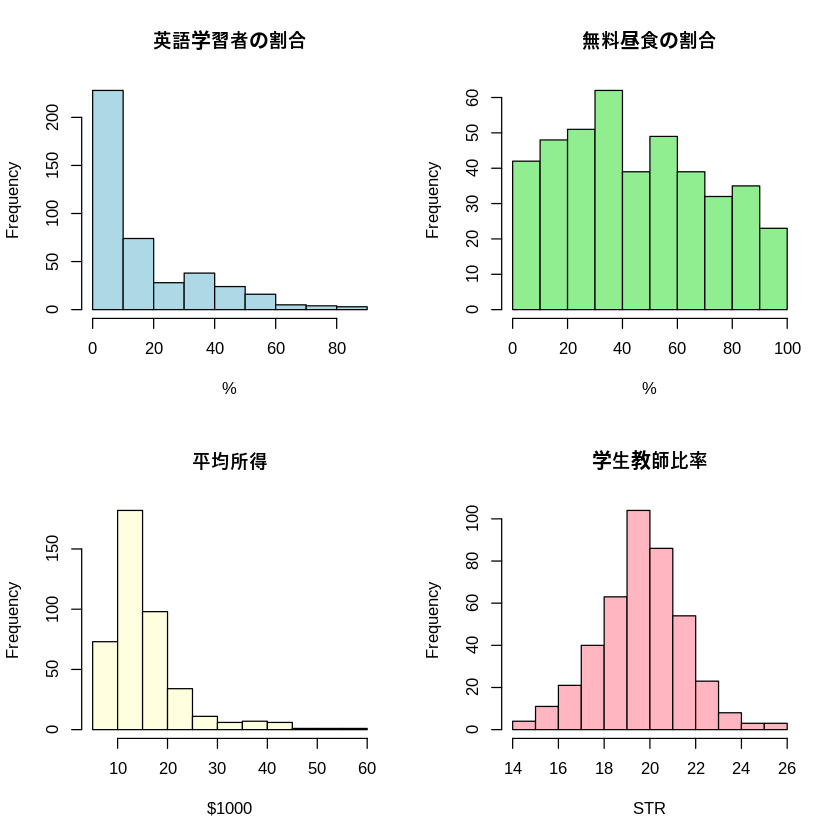

In [9]:
# 模範解答
# 1. 記述統計
cat("=== データの記述統計 ===", "\n")
vars_of_interest <- c("score", "STR", "english", "lunch", "income")
print(summary(CASchools[, vars_of_interest]))

# 分布の可視化
par(mfrow = c(2, 2))
hist(CASchools$english, main = "英語学習者の割合", xlab = "%", col = "lightblue")
hist(CASchools$lunch, main = "無料昼食の割合", xlab = "%", col = "lightgreen")
hist(CASchools$income, main = "平均所得", xlab = "$1000", col = "lightyellow")
hist(CASchools$STR, main = "学生教師比率", xlab = "STR", col = "lightpink")
par(mfrow = c(1, 1))

# 2-3. 外的妥当性への脅威
cat("\n=== 外的妥当性への脅威 ===", "\n\n")
cat("1. 地理的特性:\n")
cat("   - カリフォルニア州は移民が多く、英語学習者の割合が高い\n")
cat("   - 他の州とは人口構成が異なる可能性\n\n")

cat("2. 教育制度の違い:\n")
cat("   - 州ごとに教育政策や予算配分が異なる\n")
cat("   - カリキュラムや評価基準の違い\n\n")

cat("3. 時間的な制約:\n")
cat("   - 1990年代後半のデータ\n")
cat("   - 現在の教育環境は大きく変化している可能性\n\n")

cat("4. 経済的特性:\n")
cat("   - カリフォルニア州の所得分布は全国平均と異なる\n")
cat("   - 都市部と農村部の混在\n")

---
## 問題5: 同時因果性のシミュレーション

同時因果性（内生性）がOLS推定量に与える影響を確認します。

1. 同時方程式モデルを生成
   - Y = β₀ + β₁X + u
   - X = γ₀ + γ₁Y + v
2. OLSの推定量がバイアスを持つことを確認

In [10]:
# 問題5の解答欄



### 模範解答

In [11]:
# 模範解答
set.seed(123)
n <- 1000
n_sim <- 1000

# 真のパラメータ
beta1_true <- 2
gamma1_true <- 0.5

beta_estimates <- numeric(n_sim)

for (i in 1:n_sim) {
  # 誤差項（相関なし）
  u <- rnorm(n, 0, 1)
  v <- rnorm(n, 0, 1)
  
  # 同時方程式を解く
  # Y = beta1 * X + u
  # X = gamma1 * Y + v
  # → Y = beta1 * (gamma1 * Y + v) + u
  # → Y(1 - beta1 * gamma1) = beta1 * v + u
  # → Y = (beta1 * v + u) / (1 - beta1 * gamma1)
  
  Y <- (beta1_true * v + u) / (1 - beta1_true * gamma1_true)
  X <- gamma1_true * Y + v
  
  # OLS推定
  beta_estimates[i] <- coef(lm(Y ~ X))[2]
}

# 結果
cat("=== 同時因果性のシミュレーション ===", "\n")
cat("真のβ₁ =", beta1_true, "\n")
cat("OLS推定量の平均:", mean(beta_estimates), "\n")
cat("バイアス:", mean(beta_estimates) - beta1_true, "\n\n")

# ヒストグラム
hist(beta_estimates, breaks = 30, main = "同時因果性下でのOLS推定量",
     xlab = expression(hat(beta)[1]), col = "lightcoral")
abline(v = beta1_true, col = "blue", lwd = 2, lty = 2)
abline(v = mean(beta_estimates), col = "red", lwd = 2)
legend("topright", legend = c("真の値", "推定値の平均"), 
       col = c("blue", "red"), lty = c(2, 1), lwd = 2)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'x'


---
## 問題6: サンプル選択バイアス

サンプル選択バイアスの影響をシミュレーションで確認します。

1. 完全なデータを生成
2. Yの値に基づいてサンプルを選択
3. 選択バイアスの影響を確認

In [12]:
# 問題6の解答欄



### 模範解答

=== サンプル選択バイアスの影響 === 


真のβ = 0.8



完全なデータ (n = 2000 ):


  β̂ = 0.7807918 



選択されたデータ (n = 1000 ):


  β̂ = 0.3243325 


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <a2>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプル選択バイアス' in 'mbcsToSbcs': dot substituted for <b9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <85>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '完全データ' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <87>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択データ' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <8a>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in text.default(x, y, ...):
“conversion failure on '選択閾値' in 'mbcsToSbcs': dot substituted for <a4>”


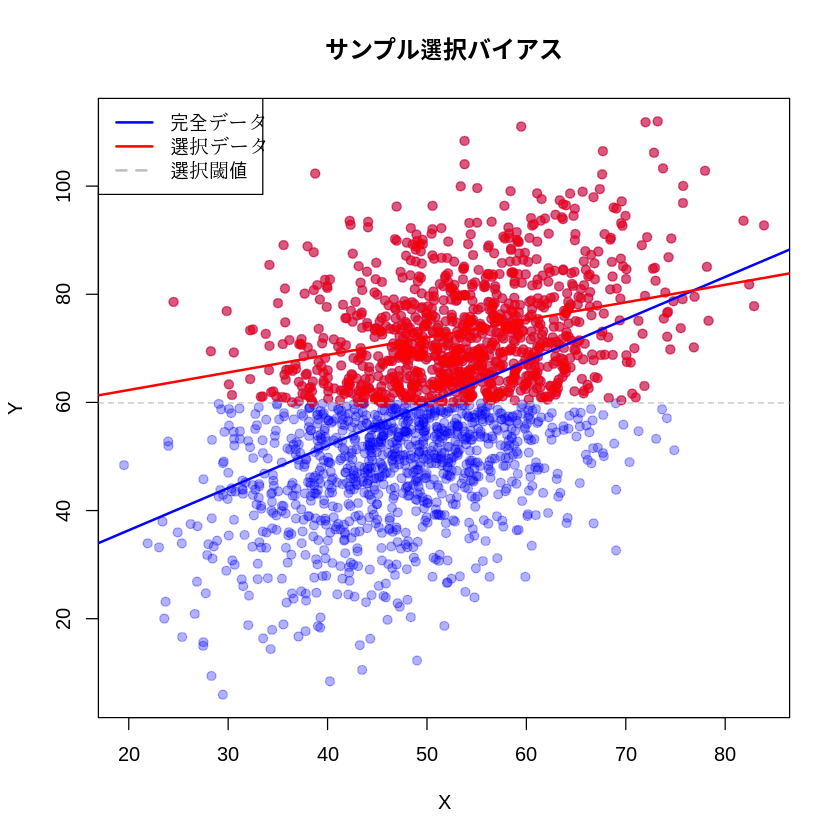

In [13]:
# 模範解答
set.seed(123)
n <- 2000

# 1. 完全なデータを生成
X <- rnorm(n, 50, 10)
u <- rnorm(n, 0, 15)
Y <- 20 + 0.8 * X + u  # 真のβ = 0.8

data_full <- data.frame(X = X, Y = Y)

# 2. サンプル選択（Yが平均以上のみ選択）
selected <- Y > median(Y)
data_selected <- data_full[selected, ]

# 3. 推定結果の比較
model_full <- lm(Y ~ X, data = data_full)
model_selected <- lm(Y ~ X, data = data_selected)

cat("=== サンプル選択バイアスの影響 ===", "\n")
cat("真のβ = 0.8\n\n")
cat("完全なデータ (n =", nrow(data_full), "):\n")
cat("  β̂ =", coef(model_full)[2], "\n\n")
cat("選択されたデータ (n =", nrow(data_selected), "):\n")
cat("  β̂ =", coef(model_selected)[2], "\n")

# 視覚化
plot(data_full$X, data_full$Y, pch = 19, col = rgb(0, 0, 1, 0.3),
     main = "サンプル選択バイアス",
     xlab = "X", ylab = "Y")
points(data_selected$X, data_selected$Y, pch = 19, col = rgb(1, 0, 0, 0.5))
abline(model_full, col = "blue", lwd = 2)
abline(model_selected, col = "red", lwd = 2)
abline(h = median(Y), col = "gray", lty = 2)
legend("topleft", legend = c("完全データ", "選択データ", "選択閾値"),
       col = c("blue", "red", "gray"), lty = c(1, 1, 2), lwd = 2)

---
## 問題7: 予測モデルの評価

モデルの予測性能を評価します。

1. k分割交差検証を実施（k=5）
2. 各分割でのRMSEを計算
3. 平均RMSEを報告

In [14]:
# 問題7の解答欄



### 模範解答

In [15]:
# 模範解答
set.seed(123)

k <- 5  # 分割数
n <- nrow(CASchools)

# ランダムに分割
folds <- sample(rep(1:k, length.out = n))

# 各分割でのRMSEを格納
rmse_values <- numeric(k)

for (i in 1:k) {
  # 訓練データとテストデータに分割
  test_idx <- folds == i
  train_data <- CASchools[!test_idx, ]
  test_data <- CASchools[test_idx, ]
  
  # モデル推定
  model <- lm(score ~ STR + english + lunch, data = train_data)
  
  # 予測とRMSE計算
  pred <- predict(model, newdata = test_data)
  rmse_values[i] <- sqrt(mean((test_data$score - pred)^2))
}

# 結果
cat("=== 5分割交差検証の結果 ===", "\n")
for (i in 1:k) {
  cat("Fold", i, ": RMSE =", rmse_values[i], "\n")
}
cat("\n平均RMSE:", mean(rmse_values), "\n")
cat("標準偏差:", sd(rmse_values), "\n")

# 訓練データ全体でのRMSE（参考）
model_full <- lm(score ~ STR + english + lunch, data = CASchools)
rmse_training <- sqrt(mean(resid(model_full)^2))
cat("\n訓練データ全体でのRMSE:", rmse_training, "\n")

=== 5分割交差検証の結果 === 


Fold 1 : RMSE = 9.781338 
Fold 2 : RMSE = 7.992011 
Fold 3 : RMSE = 10.96972 
Fold 4 : RMSE = 7.932623 
Fold 5 : RMSE = 8.617825 



平均RMSE: 9.058704 


標準偏差: 1.30139 



訓練データ全体でのRMSE: 9.036737 


---
## 問題8: モデルの頑健性チェック

異なる仕様でモデルの頑健性を確認します。

1. ベースモデル: score ~ STR + english + lunch
2. 追加コントロール変数を含むモデル
3. STRの係数の安定性を確認

In [16]:
# 問題8の解答欄



### 模範解答

In [17]:
# 模範解答
# 複数の仕様でモデルを推定
model1 <- lm(score ~ STR, data = CASchools)
model2 <- lm(score ~ STR + english, data = CASchools)
model3 <- lm(score ~ STR + english + lunch, data = CASchools)
model4 <- lm(score ~ STR + english + lunch + income, data = CASchools)
model5 <- lm(score ~ STR + english + lunch + income + calworks, data = CASchools)
model6 <- lm(score ~ STR + english + lunch + income + calworks + expenditure, 
             data = CASchools)

# STRの係数を抽出
str_coefs <- c(
  coef(model1)["STR"],
  coef(model2)["STR"],
  coef(model3)["STR"],
  coef(model4)["STR"],
  coef(model5)["STR"],
  coef(model6)["STR"]
)

str_se <- c(
  summary(model1)$coefficients["STR", 2],
  summary(model2)$coefficients["STR", 2],
  summary(model3)$coefficients["STR", 2],
  summary(model4)$coefficients["STR", 2],
  summary(model5)$coefficients["STR", 2],
  summary(model6)$coefficients["STR", 2]
)

# 結果の表示
cat("=== STR係数の頑健性チェック ===", "\n")
results <- data.frame(
  Model = 1:6,
  Controls = c("none", "+english", "+lunch", "+income", "+calworks", "+expenditure"),
  STR_coef = str_coefs,
  SE = str_se,
  t_stat = str_coefs / str_se
)
print(round(results, 4))

# 視覚化
plot(1:6, str_coefs, type = "b", pch = 19,
     main = "STR係数の安定性",
     xlab = "モデル", ylab = "STR係数",
     ylim = c(min(str_coefs - 2*str_se), max(str_coefs + 2*str_se)))
arrows(1:6, str_coefs - 1.96*str_se, 1:6, str_coefs + 1.96*str_se,
       angle = 90, code = 3, length = 0.1)
abline(h = 0, col = "red", lty = 2)

=== STR係数の頑健性チェック === 


ERROR: Error in Math.data.frame(structure(list(Model = 1:6, Controls = c("none", : non-numeric-alike variable(s) in data frame: Controls


---
## 問題9: 外れ値と影響点の分析

回帰診断を行い、影響力の強い観測値を特定します。

1. Cook's Distance を計算
2. レバレッジを計算
3. 影響力の強い観測値を特定し、除外した場合の推定結果を確認

In [18]:
# 問題9の解答欄



### 模範解答

=== 影響点の分析 === 


Cook's Distance >  0.00952381 : 31 観測値


レバレッジ > 0.01904762 : 35 観測値



Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <90>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'レバレッジ' in 'mbcsToSbcs': dot substituted for <b8>”



=== 影響点除外後の係数 === 
元のモデル:
(Intercept)         STR     english       lunch 
700.1499572  -0.9983090  -0.1215735  -0.5473454 

影響点除外後:
 (Intercept)          STR      english        lunch 
711.61362651  -1.56898639  -0.07490378  -0.57004908 


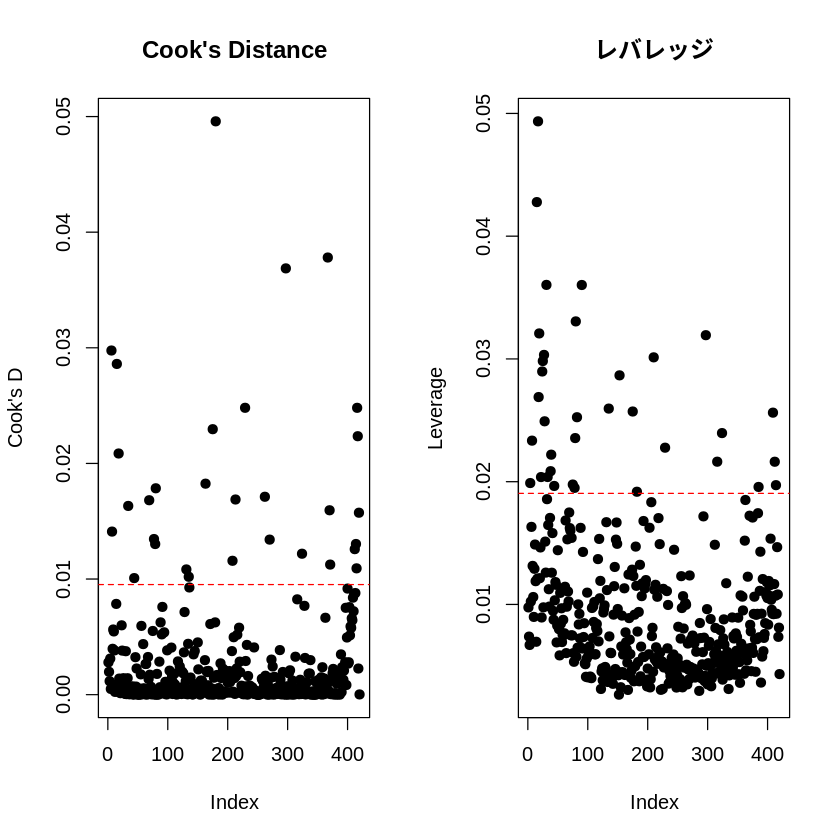

In [19]:
# 模範解答
model <- lm(score ~ STR + english + lunch, data = CASchools)

# 1. Cook's Distance
cooks_d <- cooks.distance(model)

# 2. レバレッジ
leverage <- hatvalues(model)

# 3. 影響力の強い観測値
n <- nrow(CASchools)
k <- 3
threshold_cooks <- 4 / n  # 一般的な閾値
threshold_leverage <- 2 * (k + 1) / n

influential_cooks <- which(cooks_d > threshold_cooks)
influential_leverage <- which(leverage > threshold_leverage)

cat("=== 影響点の分析 ===", "\n")
cat("Cook's Distance > ", threshold_cooks, ":", length(influential_cooks), "観測値\n")
cat("レバレッジ >", threshold_leverage, ":", length(influential_leverage), "観測値\n\n")

# 視覚化
par(mfrow = c(1, 2))
plot(cooks_d, main = "Cook's Distance", ylab = "Cook's D", pch = 19)
abline(h = threshold_cooks, col = "red", lty = 2)

plot(leverage, main = "レバレッジ", ylab = "Leverage", pch = 19)
abline(h = threshold_leverage, col = "red", lty = 2)
par(mfrow = c(1, 1))

# 影響点を除外した推定
if (length(influential_cooks) > 0) {
  model_robust <- lm(score ~ STR + english + lunch, 
                     data = CASchools[-influential_cooks, ])
  cat("\n=== 影響点除外後の係数 ===", "\n")
  cat("元のモデル:\n")
  print(coef(model))
  cat("\n影響点除外後:\n")
  print(coef(model_robust))
}

---
## 問題10: 総合的な研究評価レポート

これまでの分析を総合して、CASchoolsデータの分析についての評価レポートを作成します。

1. 主要な分析結果のまとめ
2. 内的妥当性の評価
3. 外的妥当性の評価
4. 結論と限界

In [20]:
# 問題10の解答欄



### 模範解答

In [21]:
# 模範解答
model_final <- lm(score ~ STR + english + lunch, data = CASchools)

cat("========================================\n")
cat("      研究評価レポート                  \n")
cat("========================================\n\n")

cat("1. 主要な分析結果\n")
cat("------------------\n")
cat("推定モデル: score ~ STR + english + lunch\n\n")
print(summary(model_final)$coefficients)
cat("\nR² =", summary(model_final)$r.squared, "\n")
cat("調整済みR² =", summary(model_final)$adj.r.squared, "\n\n")

cat("2. 内的妥当性の評価\n")
cat("--------------------\n")
cat("強み:\n")
cat("  - 複数のコントロール変数を含んでいる\n")
cat("  - サンプルサイズが十分大きい (n=420)\n\n")
cat("弱み/脅威:\n")
cat("  - 省略変数バイアス（家庭環境、教師の質など）\n")
cat("  - 同時因果性の可能性\n")
cat("  - 測定誤差の存在\n\n")

cat("3. 外的妥当性の評価\n")
cat("--------------------\n")
cat("制限:\n")
cat("  - カリフォルニア州のみのデータ\n")
cat("  - 1990年代後半の時点\n")
cat("  - 他州や他国への一般化には注意が必要\n\n")

cat("4. 結論と限界\n")
cat("---------------\n")
cat("結論:\n")
cat("  - STRはscoreに負の関連があるが、他の変数を制御すると\n")
cat("    統計的に有意でない場合がある\n")
cat("  - 社会経済的要因（english, lunch）の影響が大きい\n\n")
cat("限界:\n")
cat("  - 観察データのため因果関係の主張は困難\n")
cat("  - 政策提言には実験的研究が望ましい\n")

      研究評価レポート                  


1. 主要な分析結果


------------------


推定モデル: score ~ STR + english + lunch



               Estimate Std. Error    t value     Pr(>|t|)
(Intercept) 700.1499572 4.68568672 149.423126 0.000000e+00
STR          -0.9983090 0.23875428  -4.181324 3.535873e-05
english      -0.1215735 0.03231728  -3.761872 1.928369e-04
lunch        -0.5473454 0.02159885 -25.341418 2.303048e-86



R² = 0.7745158 


調整済みR² = 0.7728897 



2. 内的妥当性の評価


--------------------


強み:


  - 複数のコントロール変数を含んでいる


  - サンプルサイズが十分大きい (n=420)



弱み/脅威:


  - 省略変数バイアス（家庭環境、教師の質など）


  - 同時因果性の可能性


  - 測定誤差の存在



3. 外的妥当性の評価


--------------------


制限:


  - カリフォルニア州のみのデータ


  - 1990年代後半の時点


  - 他州や他国への一般化には注意が必要



4. 結論と限界


---------------


結論:


  - STRはscoreに負の関連があるが、他の変数を制御すると


    統計的に有意でない場合がある


  - 社会経済的要因（english, lunch）の影響が大きい



限界:


  - 観察データのため因果関係の主張は困難


  - 政策提言には実験的研究が望ましい
